# 爬取网站ppt NBA的数据--案例学习

## 简单爬虫

In [12]:
# 原始爬虫
import requests
url = "https://www.ptt.cc/bbs/nba/index.html"
response = requests.get(url)
with open('output.html', 'w',encoding = 'utf-8') as f: #将爬取的网页内容写入本地文件，w表示写入模式,
                                                       #如果没有output.html文件会自动创建
    f.write(response.text)



- 为什么使用get方法？
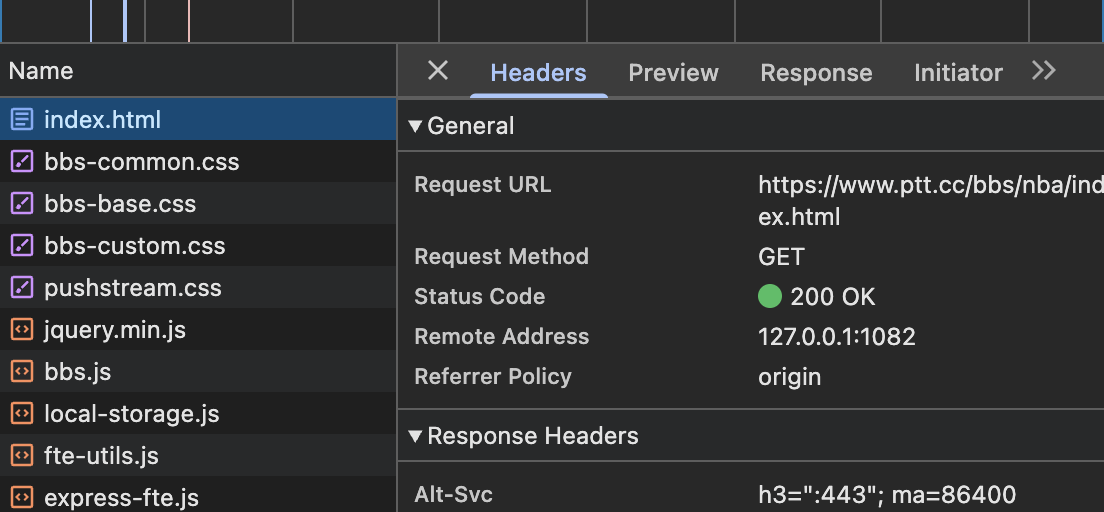
回到源网站发现，检查网页页面中的network板块中，index.html文件排在第一位，且使用的方法是get

In [13]:

# 在之前的基础上加入检查网页是否正确的选项
import requests
url = "https://www.ptt.cc/bbs/nba/index.html"
response = requests.get(url)
if response.status_code == 200:  #检查网页是否正确响应，200表示成功
    with open('output.html', 'w',encoding = 'utf-8') as f: #将爬取的网页内容写入本地文件，w表示写入模式
        f.write(response.text)
    print("网页抓取成功")
else:
    print(f"网页抓取失败，状态码：{response.status_code}")

    



KeyboardInterrupt: 

## 反爬虫
常见的反爬虫手段：
1. 检查请求器的header
2. 输入验证码
3. 滑动解锁

### 1. 应对检查请求器的header

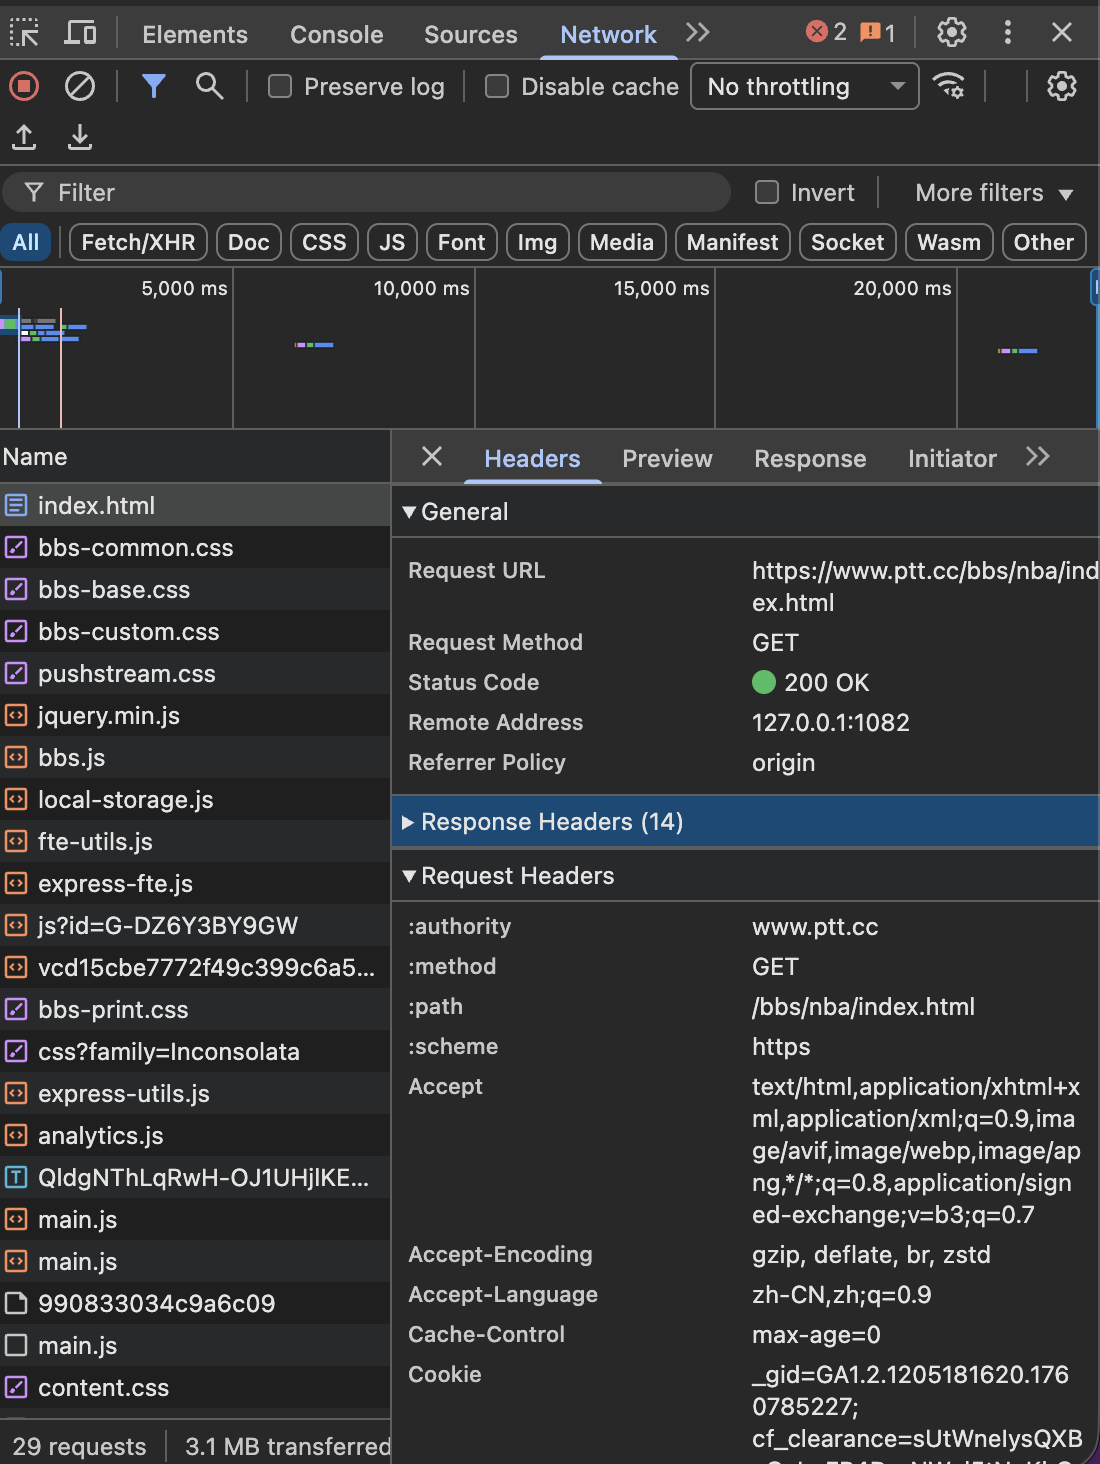

从截图上可以看见，Headers分为response和requests两类

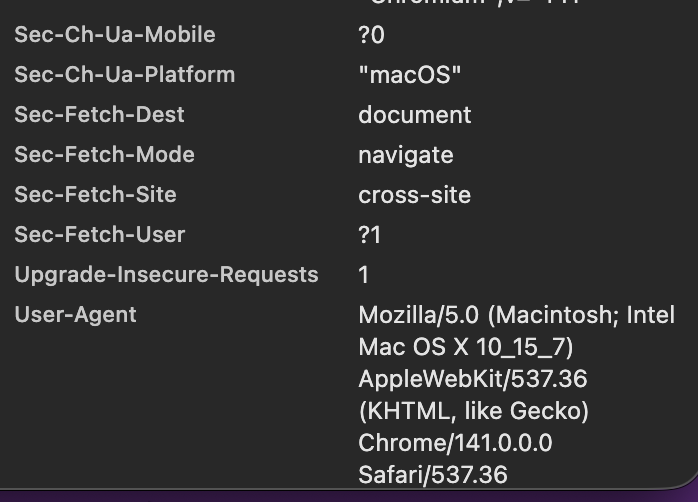

user-agent 选项告诉了浏览器的信息

In [ ]:
# 加入headers选项的爬虫
import requests
url = "https://www.ptt.cc/bbs/nba/index.html"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36 "}
response = requests.get(url, headers=headers) # 第一个headers是get的参数，第二个headers是我们定义的变量
if response.status_code == 200:
    with open('output.html','w',encoding = 'utf-8') as f:
        f.write(response.text)
    print("网页抓取成功")
else:
    print(f"网页抓取失败，状态码：{response.status_code}")

网页抓取成功


## 使用BeautifulSoup解析网页，获得资料

In [ ]:
# 先确保安装BeautifulSoup库
# pip install beautifulsoup4
# 已经安装号之后使用from bs4 import BeautifulSoup


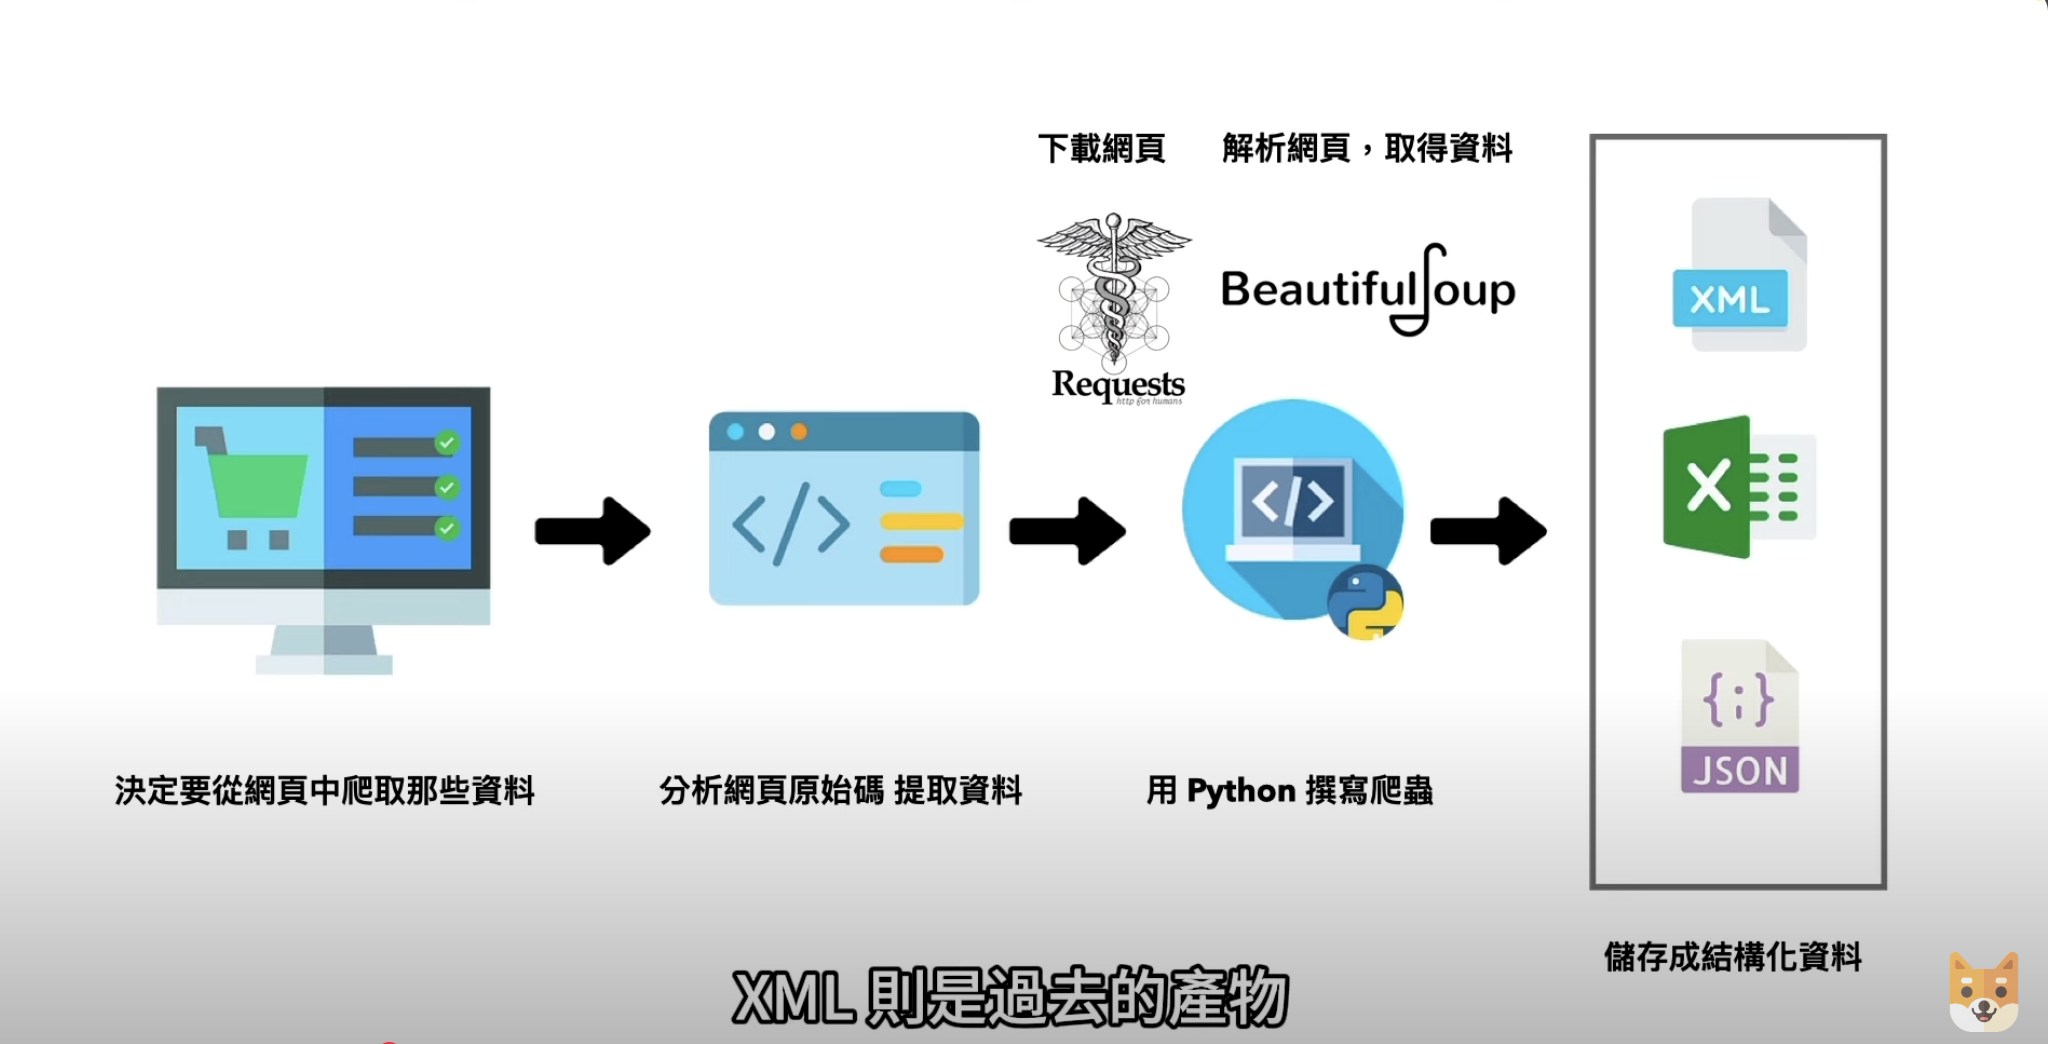

在熟悉了爬虫流程之后，我们回顾流程，首先要明确我们要从网页中爬取哪些信息--》分析原始网页--》利用爬虫爬取--》整理为结构化的资料

- 假设我们要爬取的是PPT NBA网站上的标题，人气和时间

In [17]:
# 使用beautifulsoup解析网页
from bs4 import BeautifulSoup
import requests
url = "https://www.ptt.cc/bbs/nba/index.html"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36 "}
response = requests.get(url, headers=headers) # 第一个headers是get的参数，第二个headers是我们定义的变量
# 将网页内容放入beautifulsoup中进行解析
soup = BeautifulSoup(response.text, 'html.parser') #html.parser是解析器

#抓取标题信息
articles = soup.find_all('div', class_ = 'r-ent') #找到所有class属性为r-ent的div标签, find_all返回的是一个列表
for a in articles: #每个a 代表文章的一个容器
    title = a.find('div',class_='title')
    if title and title.a: # 表示title存在且其中的超链接存在，<a>表示超链接，和for a in articles中的a不是同一个变量
        title = title.a.text #获取标题文本，去除html标记
    else:
        title = "没有标题"

# 抓取人气指标
    popular = a.find('div', class_='nrec')
    if popular and popular.span:
        popular = popular.span.text
    else:
        popular = "N/A"
    
    
# 处理发布日期
    dates = a.find('div',class_ = 'date')
    if dates:
        dates = dates.text
    else:
        dates = "N/A"
    print(f"{title}，人气：{popular}，日期：{dates}")

# if response.status_code == 200:
#     with open('output.html','w',encoding = 'utf-8') as f:
#         f.write(response.text)
#     print("网页抓取成功")
# else:
#     print(f"网页抓取失败，状态码：{response.status_code}")



[BOX ] Timberwolves 110:126 76ers (Preseason)，人气：11，日期：10/18
[BOX ] Nuggets 91:94 Thunder (Preseason)，人气：43，日期：10/18
[BOX ] Pacers 104:133 Spurs (Preseason)，人气：28，日期：10/18
[情報] 熱火裁掉Precious Achiuwa，人气：44，日期：10/18
[新聞] NBA／暌違8個月再度出賽繳全能數據 安比，人气：14，日期：10/18
[情報] 緯來體育台調降價格，人气：97，日期：10/18
[情報] 太陽裁掉Butler，人气：68，日期：10/18
[新聞] 暌違8個月重返賽場　Embiid：打球是最開，人气：15，日期：10/18
[公告] 板規v11.0，人气：N/A，日期： 9/16
[情報] 2025-26 NBA Schedule (10/03 ~ 11/30)，人气：17，日期： 9/18


## 存储为结构化数据

### json文件
- 储存结构化的文件
- json格式：当你想要获取服务器前后端的资料或者你想要将资料传递给别人的时候都可以使用
- 使用json套件+创建列表+json.dump（）函数

In [ ]:
# 使用beautifulsoup解析网页
from bs4 import BeautifulSoup
import json
import requests
url = "https://www.ptt.cc/bbs/nba/index.html"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36 "}
response = requests.get(url, headers=headers) # 第一个headers是get的参数，第二个headers是我们定义的变量
# 将网页内容放入beautifulsoup中进行解析
soup = BeautifulSoup(response.text, 'html.parser') #html.parser是解析器

# 创建一个列表来储存信息
data_list = []
#抓取标题信息
articles = soup.find_all('div', class_ = 'r-ent') #找到所有class属性为r-ent的div标签, find_all返回的是一个列表
for a in articles: #每个a 代表文章的一个容器
    data = {}  # 创建一个字典来储存每篇文章的信息
    title = a.find('div',class_='title')
    if title and title.a: # 表示title存在且其中的超链接存在，<a>表示超链接，和for a in articles中的a不是同一个变量
        title = title.a.text #获取标题文本，去除html标记
    else:
        title = "没有标题"
    data['title'] = title  # 将标题存入字典

# 抓取人气指标
    popular = a.find('div', class_='nrec')
    if popular and popular.span:
        popular = popular.span.text
    else:
        popular = "N/A"
    data['popular'] = popular  # 将人气存入字典
    
# 处理发布日期
    dates = a.find('div',class_ = 'date')
    if dates:
        dates = dates.text
    else:
        dates = "N/A"
    data['date'] = dates  # 将日期存入字典
    data_list.append(data)  # 将每篇文章的字典添加到列表中
    #  print(f"{title}，人气：{popular}，日期：{dates}")
    
# 将数据保存为json文件
with open("ppt_nba_data.json","w",encoding="utf-8") as json_file:
    json.dump(data_list, json_file, ensure_ascii=False, indent=4) 
    # ensure_ascii=False确保中文字符正确保存，indent=4设置缩进为4个空格使得json文件更易读
print("数据已经保存为ppt_nba_data.json文件")

# if response.status_code == 200:
#     with open('output.html','w',encoding = 'utf-8') as f:
#         f.write(response.text)
#     print("网页抓取成功")
# else:
#     print(f"网页抓取失败，状态码：{response.status_code}")

 

数据已经保存为ppt_nba_data.json文件


### excel文件
- 使用pandas套件来进行

In [ ]:
# 使用beautifulsoup解析网页
from bs4 import BeautifulSoup
import json
import requests
import pandas as pd # 导入pandas库用于数据处理和保存为excel
url = "https://www.ptt.cc/bbs/nba/index.html"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36 "}
response = requests.get(url, headers=headers) # 第一个headers是get的参数，第二个headers是我们定义的变量
# 将网页内容放入beautifulsoup中进行解析
soup = BeautifulSoup(response.text, 'html.parser') #html.parser是解析器

# 创建一个列表来储存信息
data_list = []
#抓取标题信息
articles = soup.find_all('div', class_ = 'r-ent') #找到所有class属性为r-ent的div标签, find_all返回的是一个列表
for a in articles: #每个a 代表文章的一个容器
    data = {}  # 创建一个字典来储存每篇文章的信息
    title = a.find('div',class_='title')
    if title and title.a: # 表示title存在且其中的超链接存在，<a>表示超链接，和for a in articles中的a不是同一个变量
        title = title.a.text #获取标题文本，去除html标记
    else:
        title = "没有标题"
    data['title'] = title  # 将标题存入字典

# 抓取人气指标
    popular = a.find('div', class_='nrec')
    if popular and popular.span:
        popular = popular.span.text
    else:
        popular = "N/A"
    data['popular'] = popular  # 将人气存入字典
    
# 处理发布日期
    dates = a.find('div',class_ = 'date')
    if dates:
        dates = dates.text
    else:
        dates = "N/A"
    data['date'] = dates  # 将日期存入字典
    data_list.append(data)  # 将每篇文章的字典添加到列表中
    
# 将数据保存为excel文件
df = pd.DataFrame(data_list)  # 将列表转换为DataFrame
df.to_excel("ppt_nba_data.xlsx", index=False, engine='openpyxl')  # 保存为excel文件,xlsx格式需要openpyxl引擎这样可以直接打开xlsx格式进行阅读
print("数据已经保存为ppt_nba_data.xlsx文件")

# if response.status_code == 200:
#     with open('output.html','w',encoding = 'utf-8') as f:
#         f.write(response.text)
#     print("网页抓取成功")
# else:
#     print(f"网页抓取失败，状态码：{response.status_code}")

 

数据已经保存为ppt_nba_data.xlsx文件


## PTT表特版爬虫（伪装cookie+图片下载）

- 使用PTT 表特 张景岚 网页为例子

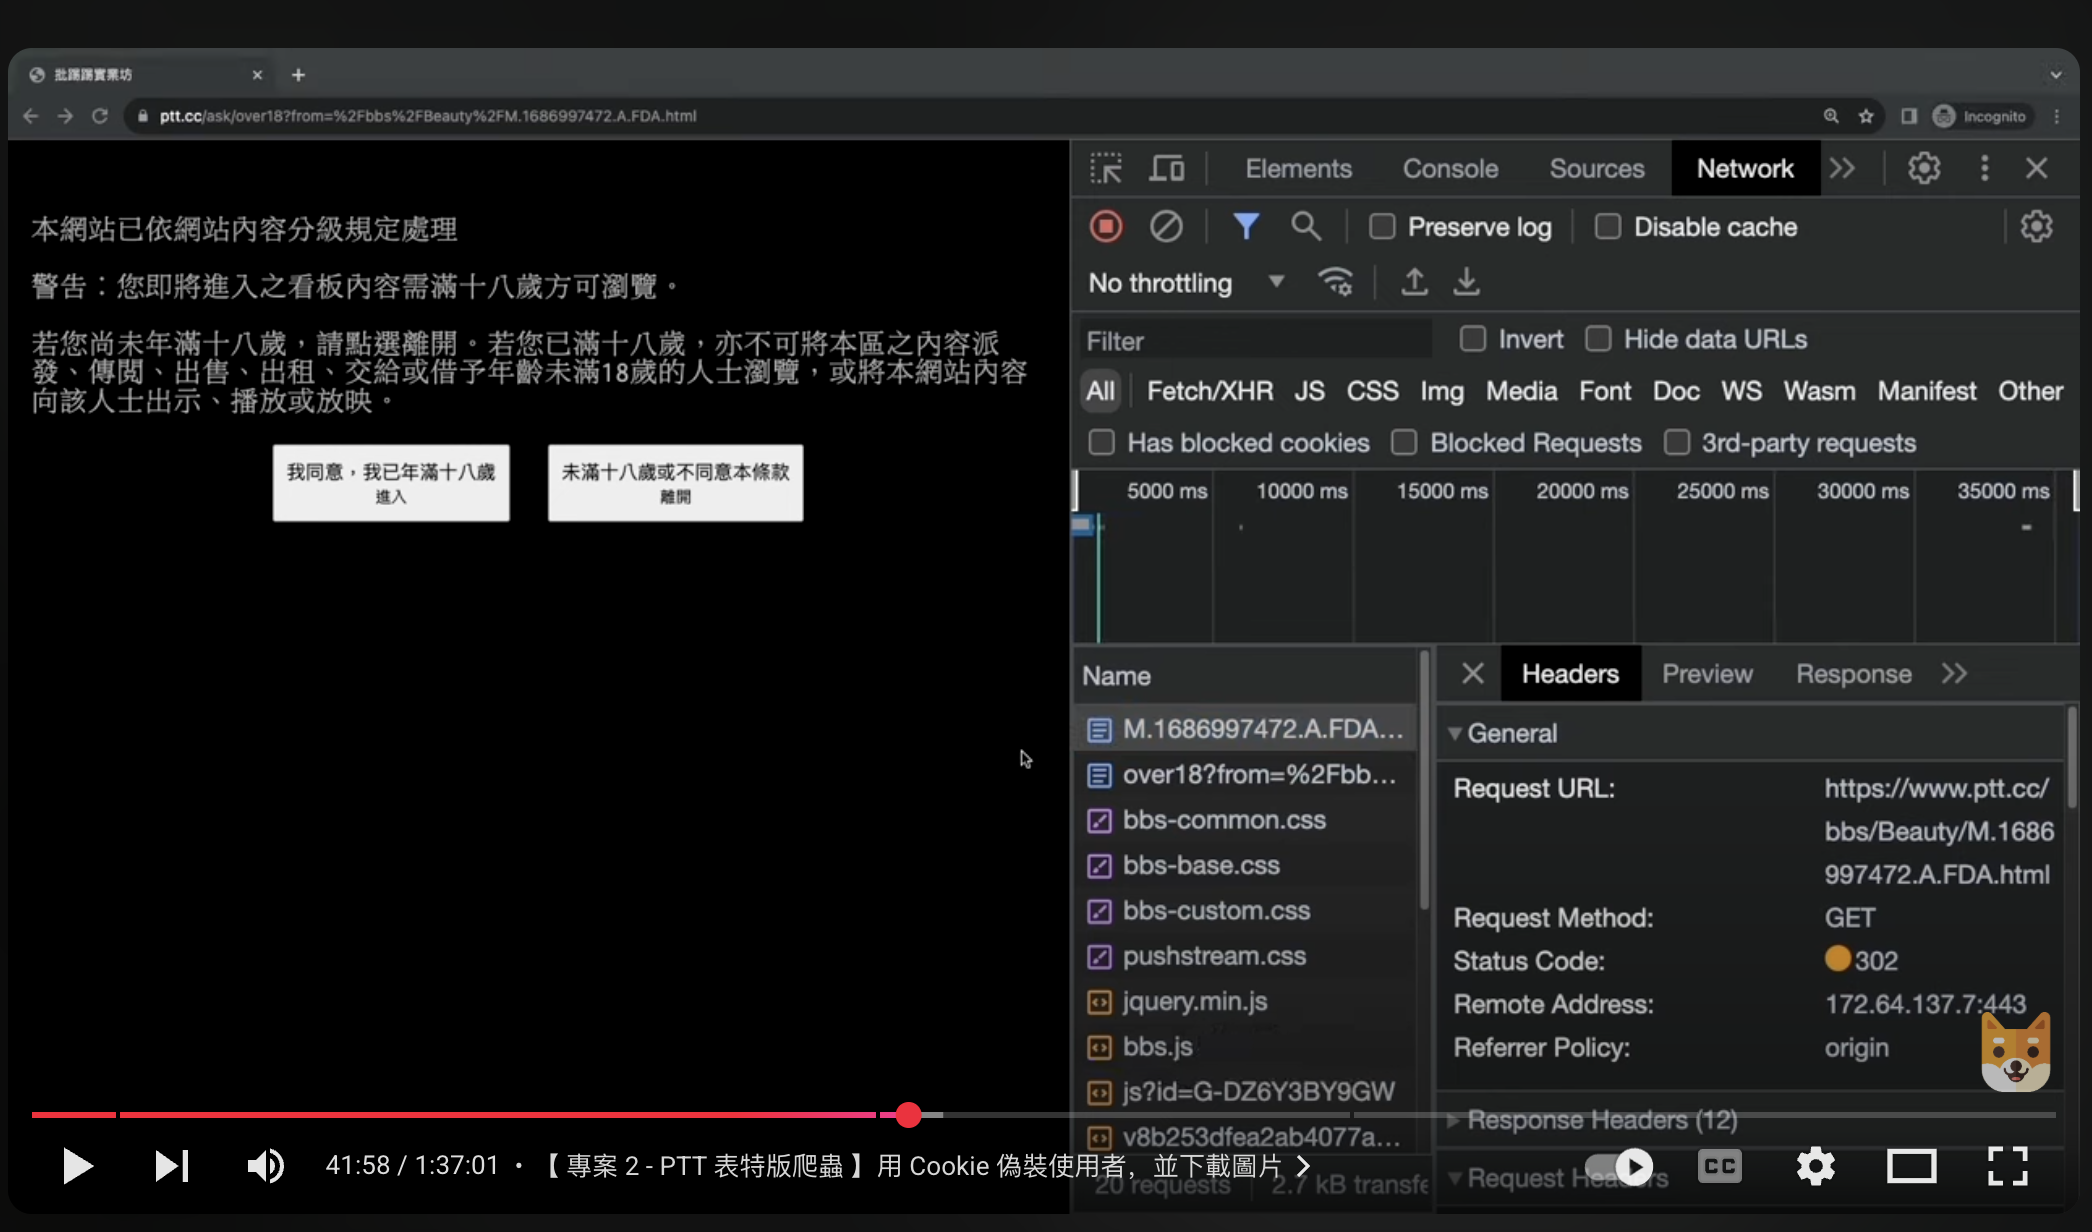

状态码`302`表示转向的意思

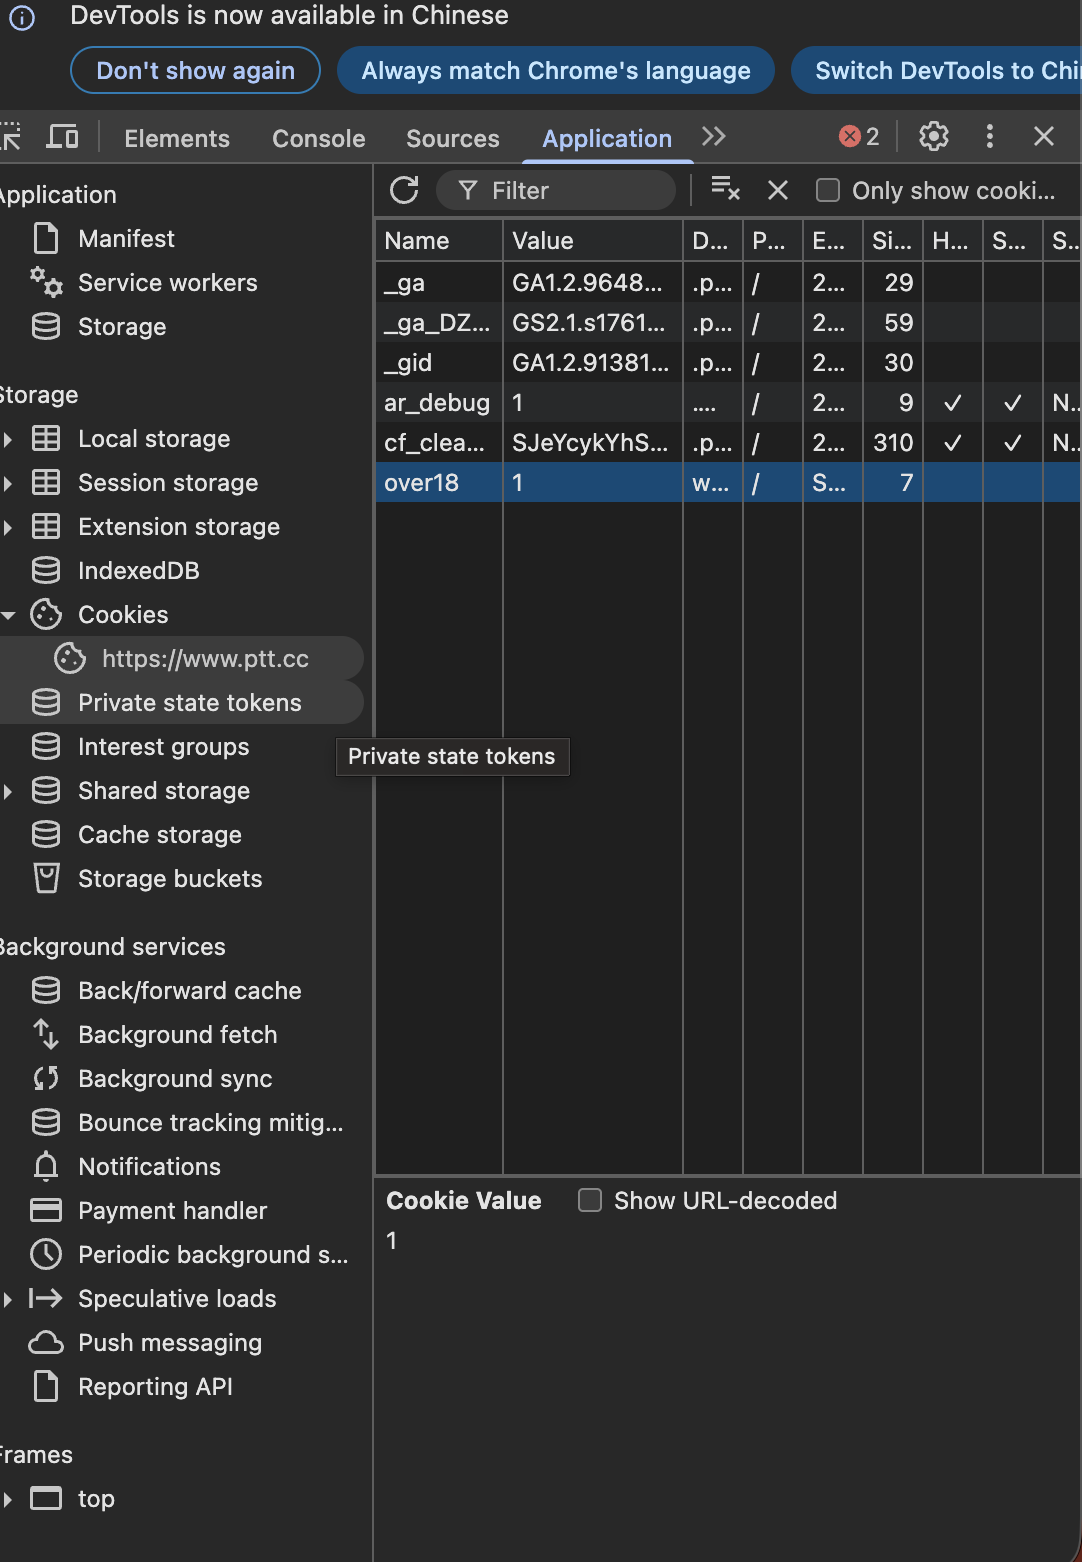

In [5]:
import requests
from bs4 import BeautifulSoup
# 添加cookie和user-agent到headers中
headers ={"Cookie":"over18=1","User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36 "}
url = "https://www.ptt.cc/bbs/Beauty/M.1756828850.A.9ED.html"
response = requests.get(url,headers = headers)
soup = BeautifulSoup(response.text, 'html.parser')
# print(soup.prettify())  # 使用prettify方法美化输出HTML结构

if response.status_code == 200:
    with open('output_cookiespracs.html','w',encoding = 'utf-8') as f:
        f.write(response.text)
    print("网页抓取成功")
else:
    print(f"网页抓取失败，状态码：{response.status_code}")
    
# 抓取图片链接
titles =  soup.find_all('span',class_='article-meta-value')
print(titles[2].text)  # 输出标题







网页抓取成功
[正妹] 張景嵐


* 继续学习图片爬取